<a href="https://colab.research.google.com/github/Mostak-Ahmmed/Data-Mining/blob/main/lab_report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Bining.csv')


bins = [0, 18, 35, 50, 100]
labels = ["Child", "Young Adult", "Adult", "Senior"]


df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

print(df)


print("\nValue Counts:")
print(df["Age Group"].value_counts())


    ID  Age    Age Group
0    1   25  Young Adult
1    2   30  Young Adult
2    3   40        Adult
3    4   45        Adult
4    5   50       Senior
5    6   80       Senior
6    7   75       Senior
7    8   42        Adult
8    9   45        Adult
9   10   64       Senior
10  11   30  Young Adult
11  12   35        Adult
12  13   60       Senior
13  14   65       Senior
14  15   32  Young Adult

Value Counts:
Age Group
Senior         6
Adult          5
Young Adult    4
Child          0
Name: count, dtype: int64


In [ ]:
import pandas as pd

file_path = "/content/Zscore.xlsx"
df = pd.read_excel(file_path)

column_to_standardize = "Exam Score"

if column_to_standardize in df.columns:

    mean_value = df[column_to_standardize].mean()
    std_dev = df[column_to_standardize].std()

    df[f"{column_to_standardize}_Zscore"] = (df[column_to_standardize] - mean_value) / std_dev


    print(df[[column_to_standardize, f"{column_to_standardize}_Zscore"]])
else:
    print(f"Error: Column '{column_to_standardize}' not found in the dataset.")


    Exam Score  Exam Score_Zscore
0           50          -1.056651
1           60          -0.396244
2           40          -1.717058
3           75           0.594366
4           50          -1.056651
5           80           0.924569
6           75           0.594366
7           65          -0.066041
8           45          -1.386854
9           70           0.264163
10          80           0.924569
11          85           1.254773
12          60          -0.396244
13          65          -0.066041
14          90           1.584976


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_excel('/content/catag.xlsx')

categorical_column = 'Color'


label_encoder = LabelEncoder()
df[categorical_column + '_LabelEncoded'] = label_encoder.fit_transform(df[categorical_column])

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = one_hot_encoder.fit_transform(df[[categorical_column]])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out([categorical_column]))

df_final = pd.concat([df, encoded_df], axis=1)

print("Dataset with Encodings:")
print(df_final)


Dataset with Encodings:
   ID  Color  Color_LabelEncoded  Color_Green  Color_Red  Color_black
0   1    Red                   2          0.0        1.0          0.0
1   2   Blue                   0          0.0        0.0          0.0
2   3  Green                   1          1.0        0.0          0.0
3   4  black                   3          0.0        0.0          1.0
4   5  Green                   1          1.0        0.0          0.0
5   6   Blue                   0          0.0        0.0          0.0
6   7  Green                   1          1.0        0.0          0.0
7   8  black                   3          0.0        0.0          1.0


In [ ]:
import pandas as pd

df = pd.read_excel('/content/mising_value.xlsx')

df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.dropna(thresh=len(df.columns) - 1, inplace=True)

print("Cleaned Dataset:")
print(df)


Cleaned Dataset:
   ID    Name   Age  Gender   Salary
0   1   ahmed  27.0    Male  52000.0
1   2  pankaj  32.0    Male  61000.0
2   3   Chris  29.8  Female  73000.0
3   4    Dana  29.0  Female  66750.0
4   5     Eva  37.0    Male  81000.0
5   6  mostak  24.0    Male  66750.0


<ipython-input-19-6fdea8076975>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


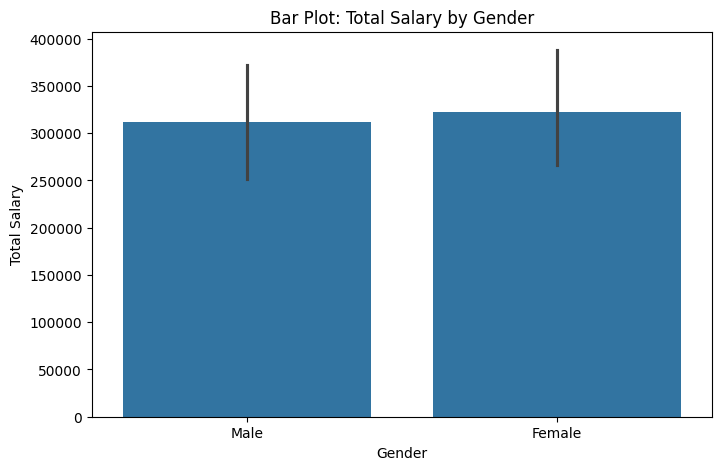

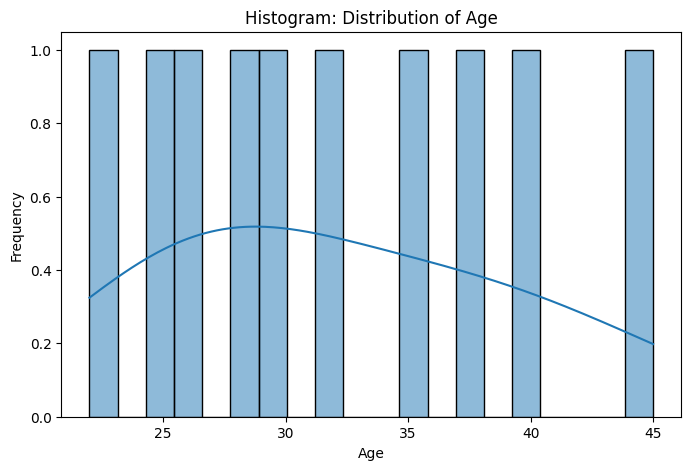

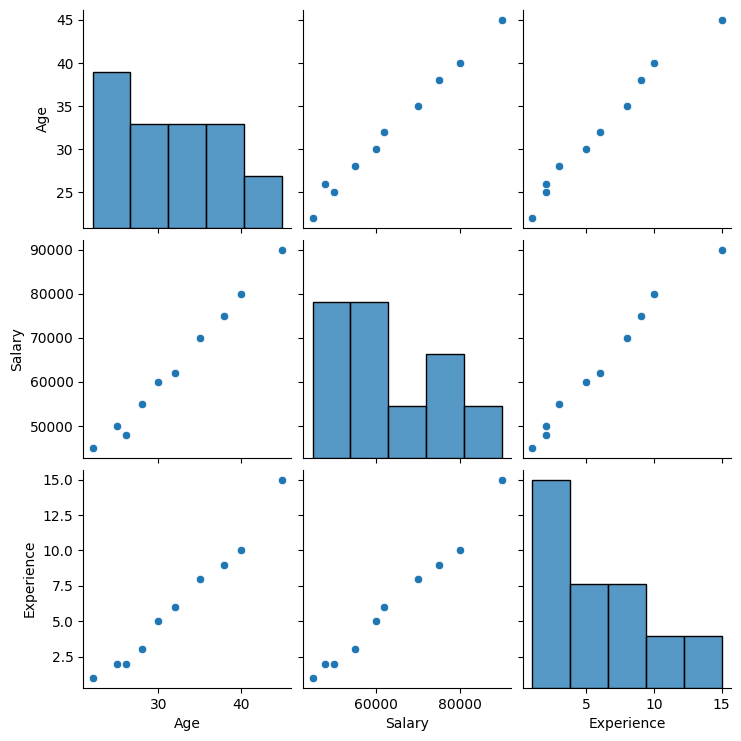

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/visulazation.xlsx')

# Bar Plot: Total Salary grouped by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=df, estimator=sum)
plt.xlabel('Gender')
plt.ylabel('Total Salary')
plt.title('Bar Plot: Total Salary by Gender')
plt.show()

# Histogram: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Age')
plt.show()

# Scatter Plot (Pairplot)
sns.pairplot(df[['Age', 'Salary', 'Experience']])
plt.show()
